In [2]:
# Standard modules
import pdb
import os
import os.path
import sys
import json
import shutil
import time
import logging
import numpy as np
import pandas as pd
import pickle
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

sys.path.append('..')
from simstack import SimstackWrapper

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
path_ini_file = os.path.join("examples","cosmos.ini")
cosmos = SimstackWrapper(path_ini_file, stack_automatically=True)
cosmos.parse_results()

Number of Layers Stacking Simultaneously = 8
Number of Layers Stacking Simultaneously = 8
Number of Layers Stacking Simultaneously = 8
Number of Layers Stacking Simultaneously = 8
Number of Layers Stacking Simultaneously = 8
Number of Layers Stacking Simultaneously = 8
Number of Layers Stacking Simultaneously = 8
Number of Layers Stacking Simultaneously = 8
Number of Layers Stacking Simultaneously = 8
Number of Layers Stacking Simultaneously = 8
Number of Layers Stacking Simultaneously = 8
Number of Layers Stacking Simultaneously = 8
Number of Layers Stacking Simultaneously = 8
Number of Layers Stacking Simultaneously = 8
Number of Layers Stacking Simultaneously = 8
Number of Layers Stacking Simultaneously = 8
Number of Layers Stacking Simultaneously = 8
Number of Layers Stacking Simultaneously = 8
Number of Layers Stacking Simultaneously = 8
Number of Layers Stacking Simultaneously = 8
Number of Layers Stacking Simultaneously = 8
Number of Layers Stacking Simultaneously = 8
Number of 

In [3]:
wavelengths = list(cosmos.results_dict.keys())
print(wavelengths)

['spire_plw', 'spire_psw', 'scuba_850']


spire_psw
spire_plw
spire_pmw
scuba_850
spire_plw


/var/folders/zh/17qnlt_94vg9lgd1dsnkzmf40000gn/T/ipykernel_22876/528850053.py:26: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  col.set_yscale('log')
/var/folders/zh/17qnlt_94vg9lgd1dsnkzmf40000gn/T/ipykernel_22876/528850053.py:26: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  col.set_yscale('log')
/var/folders/zh/17qnlt_94vg9lgd1dsnkzmf40000gn/T/ipykernel_22876/528850053.py:25: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  col.scatter(x, cosmos_results[:,j,k]*1e3, marker=marker[k])


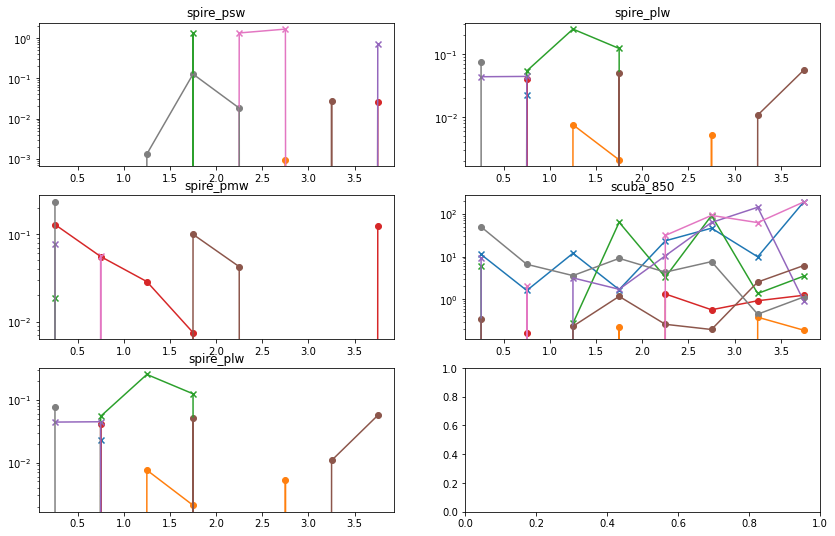

In [4]:
split_dict = json.loads(cosmos.config_dict['catalog']['classification'])
zbins = np.array(json.loads(split_dict['redshift']['bins']))
x = np.array(zbins[:-1]+zbins[1:])*0.5
wavelengths = list(cosmos.results_dict.keys())
if len(wavelengths) < 4:
    nrows = 1
    ncols = len(wavelengths)
else:
    nrows = 3
    ncols = 2
     
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=[14,9])
marker = ['x','o']
for iwv, row in enumerate(ax):
    for jwv, col in enumerate(row):
        kwv = ncols*jwv + iwv
        if kwv < len(wavelengths):
            wv = wavelengths[kwv]
            print(wv)
            cosmos_results = cosmos.results_dict[wv]['flux_density']
            nps = np.shape(cosmos_results)
            for j in range(nps[1]):
                for k in range(nps[2]):
                    col.plot(x, cosmos_results[:,j,k]*1e3)
                    col.scatter(x, cosmos_results[:,j,k]*1e3, marker=marker[k])
                    col.set_yscale('log')
            col.set_title(wv)

In [4]:
split_dict = json.loads(cosmos.config_dict['catalog']['classification'])
print(split_dict)

{'split_type': 'labels', 'redshift': {'id': 'PHOTOZ', 'bins': '[0.01, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]'}, 'stellar_mass': {'id': 'MASS_MED', 'bins': '[8.5, 9.5, 10.0, 11.0, 12.0]'}, 'pops': {'id': 'CLASS', 'bins': 2}}


In [32]:
zbins = np.array(json.loads(split_dict['redshift']['bins']))
x = np.array(zbins[:-1]+zbins[1:])*0.5
print(len(x))
print(len(cosmos.results_dict[wv]['flux_density'][:,0,0]))

8
8


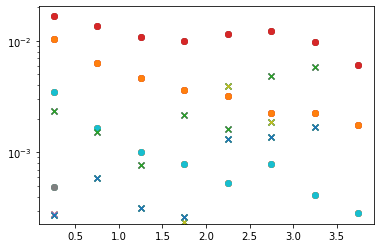

In [63]:
asize=np.shape(cosmos.results_dict[wv]['flux_density'])
marker = ['x','o']
#plt.subplots(1,3, figsize=(14,6))
for iwv, wv in enumerate(cosmos.results_dict):
    for imass in range(asize[1]):
        for ipop in range(asize[2]):
            plt.scatter(x, cosmos.results_dict['spire_psw']['flux_density'][:,imass,ipop], marker = marker[ipop])
            plt.yscale('log')

In [51]:
x

array([0.255, 0.75 , 1.25 , 1.75 , 2.25 , 2.75 , 3.25 , 3.75 ])

TypeError: 'AxesSubplot' object is not iterable

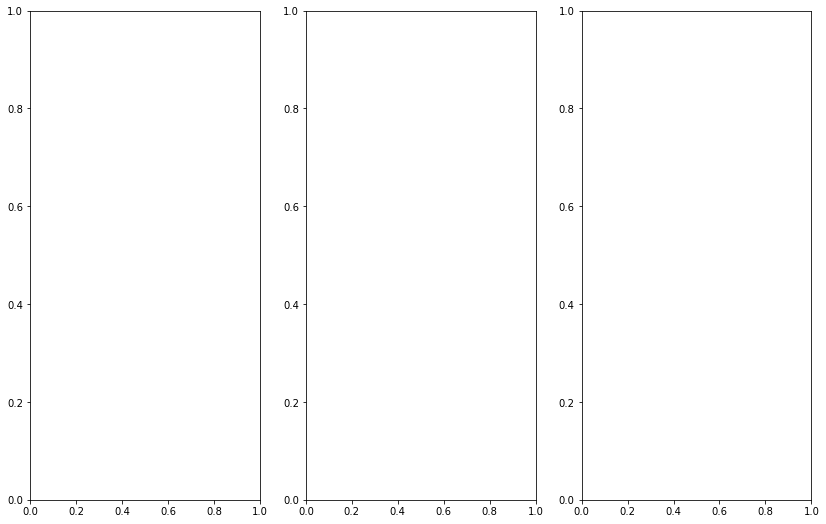

In [19]:
split_dict = json.loads(cosmos.config_dict['catalog']['classification'])

wavelengths = list(cosmos.results_dict.keys())
if len(wavelengths) < 4:
    nrows = 1
    ncols = len(wavelengths)
else:
    nrows = 3
    ncols = 2
     
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=[14,9])
marker = ['x','o']
for iwv, row in enumerate(ax):
    for jwv, col in enumerate(row):
        kwv = ncols*jwv + iwv
        if kwv < len(wavelengths):
            wv = wavelengths[kwv]
            print(wv)
            cosmos_results = cosmos.results_dict[wv]['flux_density']
            nps = np.shape(cosmos_results)
            for j in range(nps[1]):
                for k in range(nps[2]):
                    col.plot(x, cosmos_results[:,j,k]*1e3)
                    col.scatter(x, cosmos_results[:,j,k]*1e3, marker=marker[k])
                    col.set_yscale('log')
            col.set_title(wv)

spire_psw
spire_plw
spire_pmw
scuba_850
spire_plw


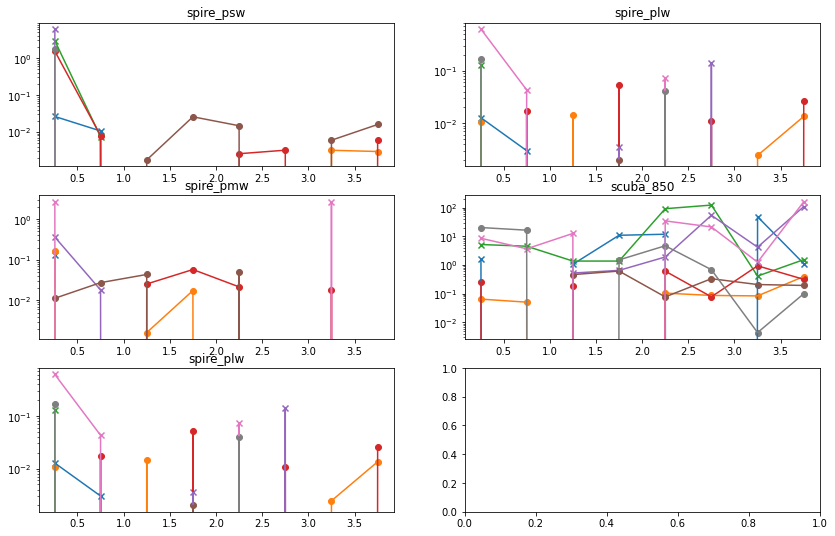

In [26]:
split_dict = json.loads(cosmos.config_dict['catalog']['classification'])
zbins = np.array(json.loads(split_dict['redshift']['bins']))
x = np.array(zbins[:-1]+zbins[1:])*0.5
wavelengths = list(cosmos.results_dict.keys())
if len(wavelengths) < 4:
    nrows = 1
    ncols = len(wavelengths)
else:
    nrows = 3
    ncols = 2
     
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=[14,9])
marker = ['x','o']
for iwv, row in enumerate(ax):
    for jwv, col in enumerate(row):
        kwv = ncols*jwv + iwv
        if kwv < len(wavelengths):
            wv = wavelengths[kwv]
            print(wv)
            cosmos_results = cosmos.results_dict[wv]['flux_density']
            nps = np.shape(cosmos_results)
            for j in range(nps[1]):
                for k in range(nps[2]):
                    col.plot(x, cosmos_results[:,j,k]*1e3)
                    col.scatter(x, cosmos_results[:,j,k]*1e3, marker=marker[k])
                    col.set_yscale('log')
            col.set_title(wv)

In [ ]:
hetdex.results_dict

{'spire_psw': {'flux_density': array([[ 0.00742964, -0.00024665, -0.00155378],
         [ 0.00886608, -0.00016534, -0.00168866],
         [ 0.01331358, -0.00041743, -0.00217376],
         [ 0.0133564 , -0.0005787 , -0.00122653],
         [ 0.05409268, -0.00029828, -0.000879  ]]),
  'std_error': array([[4.38808562e-04, 6.73230491e-05, 7.47129525e-04],
         [5.17188891e-04, 9.79089749e-05, 4.92194423e-04],
         [8.69068309e-04, 1.11879148e-04, 4.03804973e-04],
         [9.80658253e-04, 9.26924837e-05, 3.23432872e-04],
         [2.34562789e-03, 6.92939527e-05, 2.29092193e-04]])},
 'spire_plw': {'flux_density': array([[ 1.18312974e-03,  5.84848511e-04, -1.37496183e-03],
         [ 1.90525248e-03,  6.91210314e-04, -5.78740707e-04],
         [ 4.55838822e-03,  3.98529715e-04, -8.32008985e-04],
         [-1.13565067e-03, -1.54551615e-04, -7.38263506e-04],
         [ 1.44021839e-02, -1.66647065e-05,  4.35966573e-04]]),
  'std_error': array([[4.37937873e-04, 6.44318416e-05, 7.50484110e-

In [35]:
path_ini_file = os.path.join("examples","hers_hetdex.ini")
hetdex = SimstackWrapper(path_ini_file, stack_automatically=True)
hetdex.parse_results()

Number of Layers Stacking Simultaneously = 3
Number of Layers Stacking Simultaneously = 3
Number of Layers Stacking Simultaneously = 3
Number of Layers Stacking Simultaneously = 3
Number of Layers Stacking Simultaneously = 3


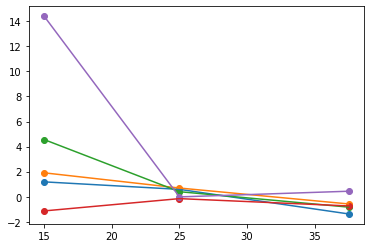

In [41]:
split_dict = json.loads(hetdex.config_dict['catalog']['classification'])
zbins = np.array(json.loads(split_dict['redshift']['bins']))
mbins = np.array(json.loads(split_dict['magnitude']['bins']))
x = (mbins[:-1]+mbins[1:])/2
wv = 'spire_plw'
marker=['o','x']
mrange=0
for z, flux_group in enumerate(hetdex.results_dict[wv]['flux_density']):
    plt.plot(x[mrange:], flux_group[mrange:]*1e3)
    plt.scatter(x[mrange:], flux_group[mrange:]*1e3)
    #plt.yscale('log')
    #pdb.set_trace()

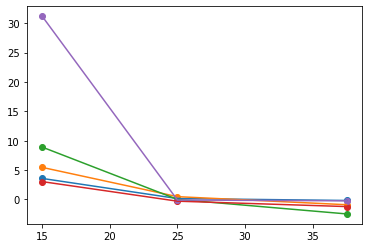

In [39]:
split_dict = json.loads(hetdex.config_dict['catalog']['classification'])
mbins = np.array(json.loads(split_dict['magnitude']['bins']))
x = (mbins[:-1]+mbins[1:])/2
wv = 'spire_pmw'
marker=['o','x']
mrange=0
for flux_group in hetdex.results_dict[wv]['flux_density']:
    plt.plot(x[mrange:], flux_group[mrange:]*1e3)
    plt.scatter(x[mrange:], flux_group[mrange:]*1e3)
    #plt.yscale('log')
    #pdb.set_trace()

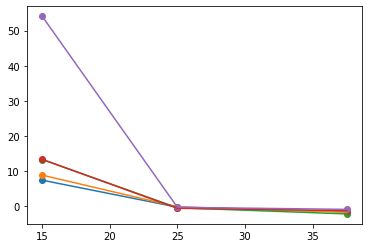

In [40]:
split_dict = json.loads(hetdex.config_dict['catalog']['classification'])
mbins = np.array(json.loads(split_dict['magnitude']['bins']))
x = (mbins[:-1]+mbins[1:])/2
wv = 'spire_psw'
marker=['o','x']
mrange=0
for flux_group in hetdex.results_dict[wv]['flux_density']:
    plt.plot(x[mrange:], flux_group[mrange:]*1e3)
    plt.scatter(x[mrange:], flux_group[mrange:]*1e3)
    #plt.yscale('log')
    #pdb.set_trace()

In [7]:
test_hetdex.maps_dict['spire_plw']['stacked_flux_densities'].keys()

dict_keys(['redshift_0p1_1', 'redshift_1_2', 'redshift_2_3', 'redshift_3_4', 'redshift_4_6'])

In [8]:
results = test_hetdex.results_dict['spire_plw']['flux_density']
nps = np.shape(results)
print(nps)

(5, 3)


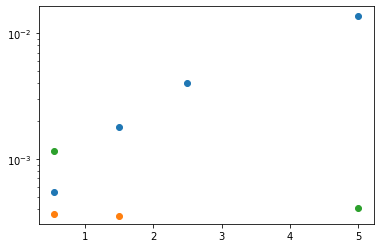

In [9]:
test_hetdex.parameter_names
split_dict = json.loads(test_hetdex.config_dict['catalog']['classification'])
zbins = np.array(json.loads(split_dict['redshift']['bins']))
x = np.array(zbins[:-1]+zbins[1:])*0.5
for i in range(nps[1]):
    plt.scatter(x, results[:,i])
    plt.yscale('log')

In [2]:
path_ini_file = os.path.join("examples","example.ini")
uvista = SimstackWrapper(path_ini_file, stack_automatically=True)
uvista.parse_results()

JSONDecodeError: Expecting property name enclosed in double quotes: line 1 column 2 (char 1)

In [ ]:
split_dict = json.loads(uvista.config_dict['catalog']['classification'])
zbins = np.array(json.loads(split_dict['redshift']['bins']))
x = np.array(zbins[:-1]+zbins[1:])*0.5
wavelengths = list(uvista.results_dict.keys())
print(wavelengths)
if len(wavelengths) < 4:
    nrows = 3
    ncols = len(wavelengths)
else:
    nrows = 3
    ncols = 2
     
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=[14,9])
marker = ['x','o']
for iwv, row in enumerate(ax):
    for jwv, col in enumerate(row):
        kwv = ncols*jwv + iwv
        if kwv < len(wavelengths):
            wv = wavelengths[kwv]
            print(wv)
            uvista_results = uvista.results_dict[wv]['flux_density']
            nps = np.shape(uvista_results)
            for j in range(nps[1]):
                for k in range(nps[2]):
                    col.plot(x, uvista_results[:,j,k]*1e3)
                    col.scatter(x, uvista_results[:,j,k]*1e3, marker=marker[k])
                    col.set_yscale('log')
            col.set_title(wv)

In [3]:
test_uvista.maps_dict['spire_plw']['stacked_flux_densities']

NameError: name 'test_uvista' is not defined

In [18]:
json.loads(json.loads(test_uvista.config_dict['catalog']['classification'])['redshift']['bins'])

[0.01, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]

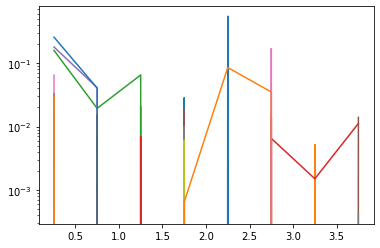

In [19]:
split_dict = json.loads(test_uvista.config_dict['catalog']['classification'])
zbins = np.array(json.loads(split_dict['redshift']['bins']))
x = np.array(zbins[:-1]+zbins[1:])*0.5
for i in range(nps[1]):
    for j in range(nps[2]):
        plt.plot(x, uvista_results[:,i,j]*1e3)
        plt.yscale ('log')

In [14]:
key = 'redshift_1p0_1p5'
test_uvista.maps_dict['spire_plw']['stacked_flux_densities'][key].params

name,value,standard error,relative error,initial value,min,max,vary
redshift_1p0_1p5__stellar_mass_8p5_9p0__pops_0,-6.7229e-04,2.8897e-06,(0.43%),-0.00034128148862879625,-inf,inf,True
redshift_1p0_1p5__stellar_mass_8p5_9p0__pops_1,2.0890e-05,8.7846e-08,(0.42%),-7.433786121485206e-06,-inf,inf,True
redshift_1p0_1p5__stellar_mass_9p0_9p5__pops_0,6.4934e-05,9.6952e-07,(1.49%),0.0016745769502356572,-inf,inf,True
redshift_1p0_1p5__stellar_mass_9p0_9p5__pops_1,6.9974e-06,8.6445e-08,(1.24%),0.0011028313089929982,-inf,inf,True
redshift_1p0_1p5__stellar_mass_9p5_10p0__pops_0,-3.9916e-05,7.0893e-07,(1.78%),0.0006787935996712521,-inf,inf,True
redshift_1p0_1p5__stellar_mass_9p5_10p0__pops_1,-1.7164e-05,1.0515e-07,(0.61%),-1.4242419677621057e-05,-inf,inf,True
redshift_1p0_1p5__stellar_mass_10p0_10p5__pops_0,-1.3026e-04,6.3296e-07,(0.49%),0.001274608713260782,-inf,inf,True
redshift_1p0_1p5__stellar_mass_10p0_10p5__pops_1,-7.9068e-05,2.3001e-07,(0.29%),0.0012451952900935691,-inf,inf,True
redshift_1p0_1p5__stellar_mass_10p5_11p0__pops_0,-8.6952e-05,6.1701e-07,(0.71%),0.000124222072599132,-inf,inf,True
redshift_1p0_1p5__stellar_mass_10p5_11p0__pops_1,-1.1707e-04,3.4383e-07,(0.29%),0.0008437409603862795,-inf,inf,True


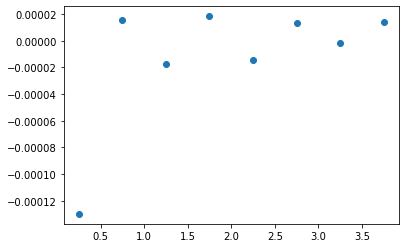

In [53]:
x

array([0.55, 1.5 , 2.5 , 3.5 , 4.5 , 5.5 ])

In [39]:
flux_density

[0.00036364386013441896,
 0.00041375502216667423,
 0.0002950844461433852,
 0.00018458649009391308,
 -8.367427002030895e-05,
 -0.0005145838158841628]

In [5]:
test_stack.split_table

,ra,dec,redshift,stellar_mass
0,34.347645,-0.898693,2.0,0.0
1,34.356080,-0.903736,3.0,0.0
2,34.356940,-0.894889,5.0,0.0
3,34.348330,-0.921676,2.0,0.0
4,34.382614,-0.794835,1.0,0.0
...,...,...,...,...
50780,13.849249,-0.328271,1.0,0.0
50781,19.643736,-0.160820,2.0,0.0
50782,13.537420,-0.319323,0.0,0.0
50783,22.692255,-0.133485,0.0,0.0
